In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

#Common Model Algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier;
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


#scorring 
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Echantillonnage 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek

from imblearn.ensemble import RUSBoostClassifier,BalancedBaggingClassifier,BalancedRandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
df=pd.read_csv('predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
#le Dataset contient 2 targets => il faudrait utiliser une seule taget pour éviter toute fuite de données "data lekeage"
print('les valeurs uniques de la première cible "Target" :\n {}'.format( df.Target.unique()))
print('les valeurs uniques de la deuxième cible "Failure Type " : \n{}'.format( df['Failure Type'].unique()))

les valeurs uniques de la première cible "Target" :
 [0 1]
les valeurs uniques de la deuxième cible "Failure Type " : 
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [5]:
#suppression des variables d'identification 
df=df.drop(["UDI","Product ID"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


# Classification binaire avec la cible "Target"
la Target dans ce cas est une donnée binaire => Failure or Not Failure 

## Analyse exploratoire des données

In [6]:
df1=df.drop("Failure Type",axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


### Exploration des caractéristiques catégorielles

0    9661
1     339
Name: Target, dtype: int64

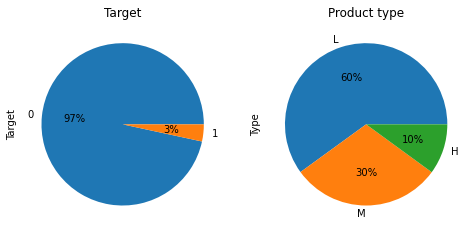

In [7]:
# Target => la target est déséquilibrée => (échantillonage, )
plt.figure(figsize=(8,4))
plt.subplot(121)
df1.Target.value_counts().plot.pie(title='Target',autopct='%1.f%%')
plt.subplot(122)
df1.Type.value_counts().plot.pie(title='Product type',autopct='%.f%%')
df1.Target.value_counts()

<AxesSubplot:xlabel='Target', ylabel='Count'>

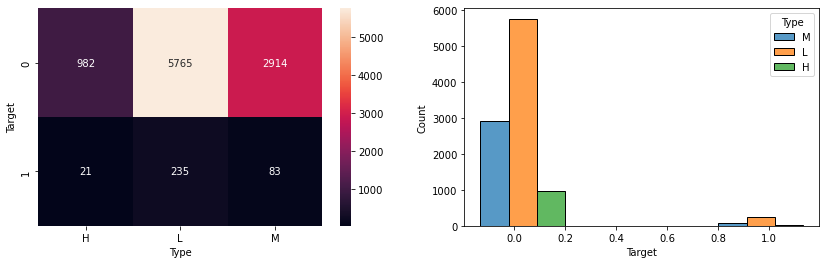

In [8]:
#relation Target Vs product Type
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.heatmap(pd.crosstab(df1.Target,df.Type),annot=True,fmt='d')
plt.subplot(122)
sns.histplot(df, x='Target',hue='Type', multiple="dodge",shrink=5)


### Exploration des caractéristiques numériques

In [9]:
df1.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


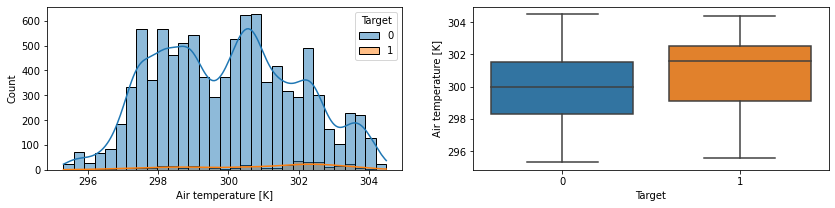

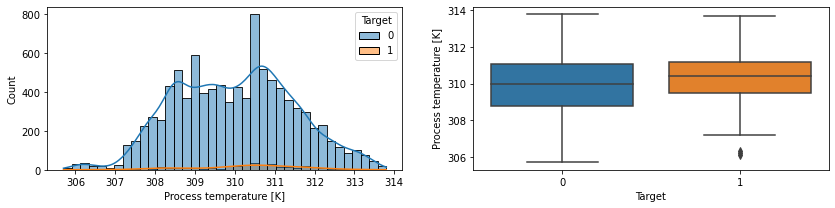

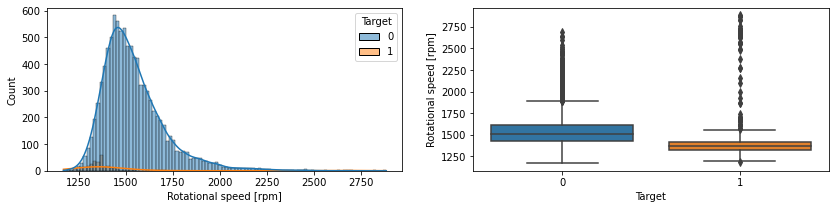

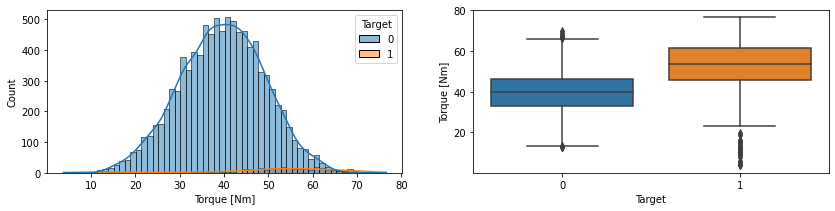

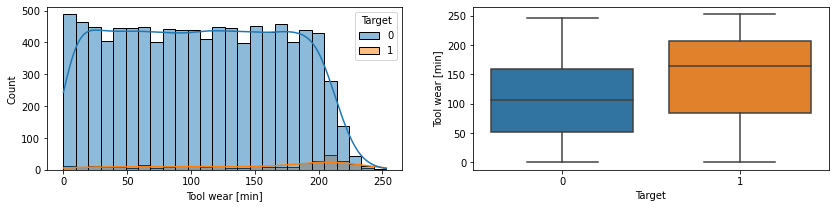

In [10]:
num_col=list(df1.select_dtypes(('float','int')).columns.values)
num_col.remove('Target')
for col in num_col:
    plt.figure(figsize=(14,3))
    plt.subplot(121)
    sns.histplot(df1,x=col,hue='Target',kde=True)
    plt.subplot(122)
    sns.boxplot(x='Target',y=col,data=df1)

<AxesSubplot:>

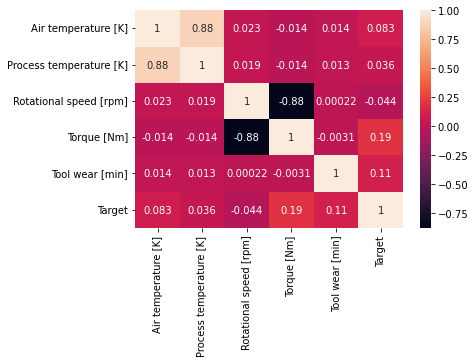

In [11]:
#Corrélation entre les variables
sns.heatmap(df.corr(),annot=True,)

## Pré-traitement des données (imputation, encodage, scaling..)

#### Encodage descaractéristiques catégorielles


In [12]:
df1.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [13]:
#LE=LabelEncoder()
#df1['Type']=LE.fit_transform(df1['Type'])
type_dict={'L':0,'M':1, 'H':2}
df1.Type.replace(type_dict,inplace=True)

In [14]:
# Renomer les colonnes 
col_nam={'Air temperature [K]':'Air_temperature_K',
'Torque [Nm]':'Torque_Nm',
'Process temperature [K]':'Process_temperature_k',
'Rotational speed [rpm]':'Rotational_speed_rpm', 
'Tool wear [min]':'Tool_wear_min'}
df1.rename(columns=col_nam,inplace=True)
df1

,Type,Air_temperature_K,Process_temperature_k,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Target
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0
9996,2,298.9,308.4,1632,31.8,17,0
9997,1,299.0,308.6,1645,33.4,22,0
9998,2,299.0,308.7,1408,48.5,25,0


#### Normalization
Normalisation après le split des données pour éviter toute fuite de données et pour évaluer le modèle sur des données qui n'a jamais vu (unseen data) 

In [19]:
def split_norm (X,y):
    '''Cette Fonction permet de déviser le dataset en train et Test data et de normaliser le dataset'''
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)
    print('Shape of X_train : ',X_train.shape)
    print('Shape of y_train : ',y_train.shape)
    print('Shape of X_test  : ',X_test.shape)
    print('Shape of y_test  : ',y_test.shape)

    col =X_train.columns
    MMS=MinMaxScaler()
    X_train=MMS.fit_transform(X_train)
    X_test=MMS.transform(X_test)
    X_train=pd.DataFrame(X_train,columns=col)
    X_test=pd.DataFrame(X_test,columns=col)
    return X_train,y_train, X_test,y_test

# Modeling

In [134]:
random_state=0
def training(X_train,y_train):
    
  
    RFR=RandomForestClassifier(
        n_jobs=1, random_state=0,
        n_estimators=10, max_features=5, max_depth=7)
    
    GBR=GradientBoostingClassifier(
        random_state=0, 
        n_estimators=10, max_features=5, max_depth=10,
        learning_rate=0.05, subsample=0.5)
    
    XGBC=XGBClassifier(objective='reg:squarederror',random_state=random_state,
        seed=0,
        n_estimators=10, max_depth=7,
        learning_rate=0.01, subsample=0.5 ,colsample_bytree= 0.8)
    
    from sklearn.ensemble import StackingClassifier
    stkclf=StackingClassifier([('RFR',RFR),
                           ('GBR',GBR),
                           ('XGBC',XGBC)])
    classifiers = [
                  stkclf,
                  LogisticRegression(random_state = random_state),
                  LinearDiscriminantAnalysis(),
                  KNeighborsClassifier(),
                  SVC(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state),
                  RandomForestClassifier(random_state=random_state),
                  AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1),
                  GradientBoostingClassifier(random_state=random_state),
                  MLPClassifier(max_iter=10000,random_state=random_state),
                  SGDClassifier(random_state = random_state),
                  XGBClassifier(eval_metric='logloss',random_state = random_state),
                  BalancedRandomForestClassifier(random_state = random_state)
                  ]
    
    res_columns=['clf name', 'clf accuracy', 'clf recall','clf precision','clf f1_score']
    df_result = pd.DataFrame(columns = res_columns)
    idx_raws=0
    for cl in tqdm(classifiers):
        monclf=cl.fit(X_train,y_train)
        ypred=monclf.predict(X_test)
        df_result.loc[idx_raws, 'clf name']= cl.__class__.__name__
        df_result.loc[idx_raws,'clf accuracy' ]=accuracy_score(y_test,ypred)
        df_result.loc[idx_raws,'clf recall' ]=recall_score(y_test,ypred)
        df_result.loc[idx_raws,'clf precision' ]=precision_score(y_test,ypred)
        df_result.loc[idx_raws,'clf f1_score' ]=f1_score(y_test,ypred)
        idx_raws=idx_raws+1
    df_result.sort_values(by='clf f1_score',ascending=False,inplace=True)
    return df_result


import itertools
def skplot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Apprentissage des modèles sans traitement du désequilibre des classes

In [135]:
y=df1['Target']
X=df1.drop('Target',axis=1)
X_train,y_train, X_test,y_test= split_norm(X,y)

Shape of X_train :  (8000, 6)
Shape of y_train :  (8000,)
Shape of X_test  :  (2000, 6)
Shape of y_test  :  (2000,)


In [136]:
training(X_train,y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:12<00:00,  1.05it/s]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
11,XGBClassifier,0.985,0.653333,0.924528,0.765625
8,GradientBoostingClassifier,0.9825,0.613333,0.884615,0.724409
6,RandomForestClassifier,0.9815,0.626667,0.839286,0.717557
0,StackingClassifier,0.9795,0.56,0.84,0.672
5,DecisionTreeClassifier,0.9705,0.653333,0.597561,0.624204
7,AdaBoostClassifier,0.971,0.64,0.607595,0.623377
9,MLPClassifier,0.972,0.493333,0.672727,0.569231
12,BalancedRandomForestClassifier,0.889,0.933333,0.243902,0.38674
3,KNeighborsClassifier,0.968,0.253333,0.703704,0.372549
2,LinearDiscriminantAnalysis,0.964,0.28,0.538462,0.368421


Confusion matrix, without normalization
[[1921    4]
 [  26   49]]


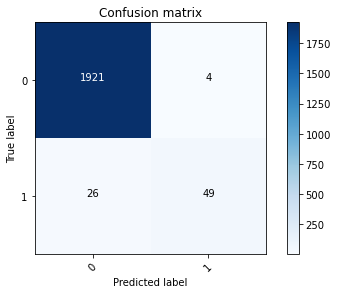

In [69]:
Model= XGBClassifier(eval_metric='logloss',random_state = random_state).fit(X_train,y_train)
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1])

## Apprentissage des modèles avec traitement du désequilibre des classes

### 1. Cost-Sensitive Learning (scale_pos_weight / class_weight) :

Au cour de l’apprentissage, on peut attribuer des poids aux observations. le poids de chaque observation sera d’autant plus important que la classe de celle-ci est minoritaire. Le principe est de redéfinir la fonction de coût du modèle en tenant compte de ces poids. 
    - scale_pos_weight  => pour les modèle de boosting  XGBClassifier, Light GBM, Catboost ..
        => recommandation pour le scale_pos_weight = le ratio des observations négatives par rapport aux  positives.
    - class_weight => pour les autres modèles 

In [20]:
y=df1['Target']
X=df1.drop('Target',axis=1)
X_train,y_train, X_test,y_test= split_norm(X,y)

Shape of X_train :  (8000, 6)
Shape of y_train :  (8000,)
Shape of X_test  :  (2000, 6)
Shape of y_test  :  (2000,)


In [21]:
random_state=0
classifiers = [
              LogisticRegression(class_weight='balanced',random_state = random_state),
              KNeighborsClassifier(),
              SVC(class_weight='balanced',random_state=random_state),
              DecisionTreeClassifier(class_weight='balanced',random_state=random_state),
              RandomForestClassifier(class_weight='balanced',random_state=random_state),
              MLPClassifier(max_iter=10000,random_state=random_state),
              SGDClassifier(class_weight='balanced',random_state = random_state),
              XGBClassifier(scale_pos_weight =30,random_state = random_state,eval_metric='logloss')
              ]

res_columns=['clf name', 'clf accuracy', 'clf recall','clf precision','clf f1_score']
df_result = pd.DataFrame(columns = res_columns)
idx_raws=0
for cl in tqdm(classifiers):
    monclf=cl.fit(X_train,y_train)
    ypred=monclf.predict(X_test)
    df_result.loc[idx_raws, 'clf name']= cl.__class__.__name__
    df_result.loc[idx_raws,'clf accuracy' ]=accuracy_score(y_test,ypred)
    df_result.loc[idx_raws,'clf recall' ]=recall_score(y_test,ypred)
    df_result.loc[idx_raws,'clf precision' ]=precision_score(y_test,ypred)
    df_result.loc[idx_raws,'clf f1_score' ]=f1_score(y_test,ypred)
    idx_raws=idx_raws+1

df_result.sort_values(by='clf f1_score',ascending=False,inplace=True)
df_result

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:10<00:00,  1.30s/it]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
7,XGBClassifier,0.9775,0.733333,0.6875,0.709677
3,DecisionTreeClassifier,0.975,0.626667,0.681159,0.652778
4,RandomForestClassifier,0.9785,0.493333,0.880952,0.632479
5,MLPClassifier,0.972,0.493333,0.672727,0.569231
2,SVC,0.902,0.866667,0.258964,0.398773
1,KNeighborsClassifier,0.968,0.253333,0.703704,0.372549
0,LogisticRegression,0.81,0.826667,0.144522,0.246032
6,SGDClassifier,0.685,0.933333,0.100719,0.181818


Confusion matrix, without normalization
[[1900   25]
 [  20   55]]


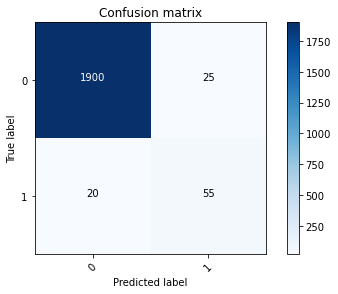

In [22]:
Model=XGBClassifier(scale_pos_weight =30,random_state = random_state,eval_metric='logloss').fit(X_train,y_train)
Model
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1])

## Ré-échantillonnage  du jeu de données

### Sous-Échantillonnage :

Lorsque le nombre d’observations dans le dataset est assez important, on a la possibilité de sous-échantillonner les observations associées à la classe la plus prépondérante. On peut réaliser un sous-échantillonnage de façon aléatoire mais on peut également utiliser d’autres techniques telles que NearMiss. 

#### Sous_échantillonnage aléatoire

In [64]:
Pos=df1[df1.Target==1]
Neg=df1[df1.Target==0]
Neg=Neg.sample(n=Pos.shape[0],random_state=0)
df_sampled=pd.concat([Pos,Neg])
y=df_sampled['Target']
X=df_sampled.drop('Target',axis=1)
X_train,y_train, X_test,y_test= split_norm(X,y)

Shape of X_train :  (542, 6)
Shape of y_train :  (542,)
Shape of X_test  :  (136, 6)
Shape of y_test  :  (136,)


In [65]:
#On peut aussi utiliser la methode RandomUnderSampler pour le sous-échantillonnage aléatoire
#y=df1['Target']
#X=df1.drop('Target',axis=1)
#X_under_sample, y_under_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
#X_train,y_train, X_test,y_test= split_norm(X_under_sample, y_under_sample)

In [66]:
training(X_train,y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.83it/s]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
0,StackingClassifier,0.919118,0.968254,0.871429,0.917293
8,GradientBoostingClassifier,0.904412,0.936508,0.867647,0.900763
7,AdaBoostClassifier,0.897059,0.904762,0.876923,0.890625
6,RandomForestClassifier,0.889706,0.952381,0.833333,0.888889
11,XGBClassifier,0.889706,0.952381,0.833333,0.888889
4,SVC,0.882353,0.873016,0.873016,0.873016
5,DecisionTreeClassifier,0.875,0.873016,0.859375,0.866142
3,KNeighborsClassifier,0.852941,0.888889,0.811594,0.848485
9,MLPClassifier,0.852941,0.857143,0.830769,0.84375
2,LinearDiscriminantAnalysis,0.801471,0.793651,0.78125,0.787402


Confusion matrix, without normalization
[[61 12]
 [ 4 59]]


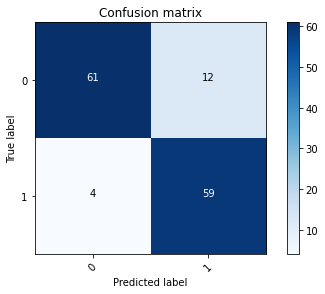

In [67]:
Model=RandomForestClassifier().fit(X_train,y_train)
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1])

#### Sous_échantillonnage avec NearMiss
NearMiss vise à séparer les observations correspondantes à des classes différentes. Son principe est de supprimer les observations de la classe majoritaire lorsque des observations associées à des classes différentes sont proches l’une de l’autre.

In [29]:
y=df1['Target']
X=df1.drop('Target',axis=1)

In [30]:
# Choix de la taille du nouveau dataset 
#distribution_of_samples = {0:400, 1:339}
# Sous-Echantillonnage en utilisant la méthode NearMiss 
nearmiss = NearMiss()#sampling_strategy = distribution_of_samples)
X_under_sample, y_under_sample = nearmiss.fit_resample(X,y)

In [31]:
X_train,y_train, X_test,y_test= split_norm(X_under_sample,y_under_sample)

Shape of X_train :  (542, 6)
Shape of y_train :  (542,)
Shape of X_test  :  (136, 6)
Shape of y_test  :  (136,)


In [32]:
training(X_train,y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.53it/s]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
0,StackingClassifier,0.897059,0.876712,0.927536,0.901408
11,XGBClassifier,0.875,0.863014,0.9,0.881119
6,RandomForestClassifier,0.852941,0.90411,0.835443,0.868421
5,DecisionTreeClassifier,0.845588,0.849315,0.861111,0.855172
8,GradientBoostingClassifier,0.852941,0.808219,0.907692,0.855072
9,MLPClassifier,0.838235,0.808219,0.880597,0.842857
7,AdaBoostClassifier,0.830882,0.808219,0.867647,0.836879
4,SVC,0.75,0.739726,0.782609,0.760563
3,KNeighborsClassifier,0.75,0.69863,0.809524,0.75
2,LinearDiscriminantAnalysis,0.713235,0.671233,0.765625,0.715328


Confusion matrix, without normalization
[[56  7]
 [10 63]]


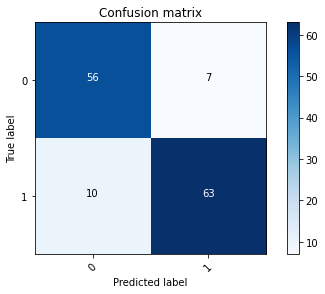

In [33]:
Model=XGBClassifier(eval_metric='logloss').fit(X_train,y_train)
Model
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1])

### Sur-Échantillonnage  avec SMOTE

In [34]:
y=df1['Target']
X=df1.drop('Target',axis=1)

In [35]:
# Choix de la taille du nouveau dataset 
#distribution_of_samples = {0:10000, 1:10000}
# Sur-Echantillonnage en utilisant la méthode SMOTE
smote = SMOTE(random_state=0)# sampling_strategy = distribution_of_samples)
X_over_sample, y_over_sample = smote.fit_resample(X,y)

In [36]:
X_train,y_train, X_test,y_test= split_norm(X_over_sample, y_over_sample)
training(X_train,y_train)

Shape of X_train :  (15457, 6)
Shape of y_train :  (15457,)
Shape of X_test  :  (3865, 6)
Shape of y_test  :  (3865,)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:50<00:00,  4.23s/it]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
11,XGBClassifier,0.9837,0.99075,0.977192,0.983924
6,RandomForestClassifier,0.972574,0.983042,0.963243,0.973042
5,DecisionTreeClassifier,0.961708,0.970195,0.954499,0.962283
7,AdaBoostClassifier,0.961449,0.967626,0.956323,0.961941
0,StackingClassifier,0.956274,0.966084,0.948058,0.956987
3,KNeighborsClassifier,0.950582,0.985098,0.922078,0.952547
8,GradientBoostingClassifier,0.942303,0.961459,0.926696,0.943758
9,MLPClassifier,0.938163,0.946557,0.931715,0.939077
4,SVC,0.927814,0.955293,0.906387,0.930198
1,LogisticRegression,0.83467,0.84481,0.829884,0.83728


Confusion matrix, without normalization
[[1874   45]
 [  18 1928]]


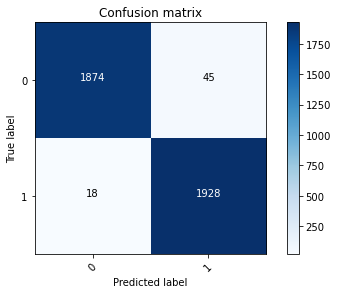

In [37]:
Model= XGBClassifier(eval_metric='logloss').fit(X_train,y_train)
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1])

### Sur-Échantillonnage  avec ADASYN

In [38]:
y=df1['Target']
X=df1.drop('Target',axis=1)
# Sur-Echantillonnage en utilisant la méthode ADASYN
X_over_sample, y_over_sample = ADASYN().fit_resample(X,y)

In [39]:
X_train,y_train, X_test,y_test= split_norm(X_over_sample, y_over_sample)
training(X_train,y_train)

Shape of X_train :  (15384, 6)
Shape of y_train :  (15384,)
Shape of X_test  :  (3846, 6)
Shape of y_test  :  (3846,)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [01:09<00:00,  5.80s/it]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
11,XGBClassifier,0.986219,0.990591,0.981865,0.986209
6,RandomForestClassifier,0.973999,0.984318,0.964158,0.974133
7,AdaBoostClassifier,0.961258,0.967067,0.955579,0.961289
0,StackingClassifier,0.959438,0.968636,0.950744,0.959606
5,DecisionTreeClassifier,0.959438,0.968636,0.950744,0.959606
3,KNeighborsClassifier,0.952418,0.986932,0.922776,0.953776
9,MLPClassifier,0.939418,0.95034,0.929448,0.939778
8,GradientBoostingClassifier,0.938898,0.952953,0.926321,0.939449
4,SVC,0.922777,0.946158,0.903194,0.924177
2,LinearDiscriminantAnalysis,0.804992,0.807632,0.801764,0.804687


Confusion matrix, without normalization
[[1898   35]
 [  18 1895]]


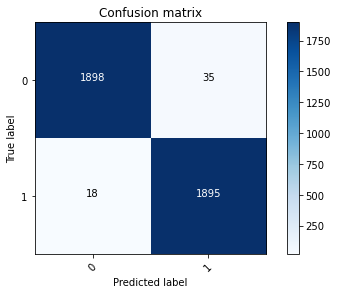

In [40]:
Model= XGBClassifier(eval_metric='logloss').fit(X_train,y_train)
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1])

### Combinaison de SMOTE et Tomek links 'SMOTETomek'

In [85]:
y=df1['Target']
X=df1.drop('Target',axis=1)
#Echantillonnage en utilisant la méthode SMOTE et ensuite NearMiss
X, y = SMOTETomek(random_state=0).fit_resample(X,y)
X_over_sample, y_over_sample = NearMiss().fit_resample(X,y)

In [86]:
X_train,y_train, X_test,y_test= split_norm(X_over_sample, y_over_sample)
training(X_train,y_train)

Shape of X_train :  (15321, 6)
Shape of y_train :  (15321,)
Shape of X_test  :  (3831, 6)
Shape of y_test  :  (3831,)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:49<00:00,  4.16s/it]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
11,XGBClassifier,0.988776,0.992769,0.985136,0.988937
6,RandomForestClassifier,0.978596,0.98812,0.970081,0.979017
0,StackingClassifier,0.963717,0.970558,0.958185,0.964332
5,DecisionTreeClassifier,0.962412,0.965393,0.960432,0.962906
7,AdaBoostClassifier,0.961368,0.965909,0.957992,0.961934
3,KNeighborsClassifier,0.957191,0.990186,0.92968,0.958979
8,GradientBoostingClassifier,0.951188,0.969525,0.93616,0.95255
9,MLPClassifier,0.943096,0.956095,0.932964,0.944388
4,SVC,0.935526,0.956095,0.919523,0.937453
10,SGDClassifier,0.8426,0.839876,0.847316,0.84358


Confusion matrix, without normalization
[[1866   29]
 [  14 1922]]


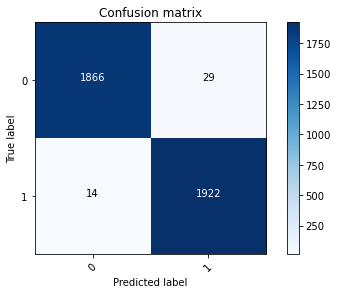

In [87]:
Model= XGBClassifier(eval_metric='logloss').fit(X_train,y_train)
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1])

### Combinaison de SMOTE et NearMiss

In [88]:
y=df1['Target']
X=df1.drop('Target',axis=1)
#Echantillonnage en utilisant la méthode SMOTE et ensuite NearMiss
X, y = SMOTE(random_state=0).fit_resample(X,y)
X_over_sample, y_over_sample = NearMiss().fit_resample(X,y)
X_train,y_train, X_test,y_test= split_norm(X_over_sample, y_over_sample)
training(X_train,y_train)

Shape of X_train :  (15457, 6)
Shape of y_train :  (15457,)
Shape of X_test  :  (3865, 6)
Shape of y_test  :  (3865,)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:55<00:00,  4.64s/it]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
11,XGBClassifier,0.989392,0.992806,0.986217,0.989501
6,RandomForestClassifier,0.976714,0.985612,0.968687,0.977076
5,DecisionTreeClassifier,0.964554,0.969681,0.960305,0.964971
7,AdaBoostClassifier,0.963777,0.970709,0.957911,0.964267
0,StackingClassifier,0.963519,0.970709,0.957425,0.964021
3,KNeighborsClassifier,0.954722,0.985612,0.928814,0.95637
8,GradientBoostingClassifier,0.948254,0.967626,0.932178,0.949571
9,MLPClassifier,0.943596,0.953237,0.935923,0.944501
4,SVC,0.929366,0.955293,0.909046,0.931596
10,SGDClassifier,0.842432,0.821172,0.859602,0.839947


In [94]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
y=df1['Target']
X=df1.drop('Target',axis=1)
X_train,y_train, X_test,y_test= split_norm(X_over_sample, y_over_sample)
